In [1]:
import os

from pinn import PinnTrainer

from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
PATH_TO_DATA = 'data'

In [3]:
full_df = pd.read_csv(os.path.join(PATH_TO_DATA, 'housing.csv'))

## Dataset preparation

This step shows a minimalistic loading and processing pipeline of the `MNIST` dataset.

In [4]:
train_df = pd.read_csv(os.path.join(PATH_TO_DATA, 'final_train_ds.csv'))
print(train_df.shape)
train_df.head()

(15480, 26)


,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,age_clipped,median_house_value,longitude,latitude,housing_median_age,total_rooms,...,population_log,total_bedrooms_log,total_rooms_log,distance_to_SF,distance_to_LA,1/distance_to_SF,1/distance_to_LA,log_distance_to_SF,log_distance_to_LA,bedroom/rooms
0,False,False,False,False,False,248200.0,0.609553,-0.633700,0.105068,0.267195,...,0.564075,0.260427,0.593930,0.594737,-0.993357,-0.220070,0.293305,0.672435,-1.128013,-0.911534
1,False,False,False,False,False,187900.0,0.559735,-0.558979,-1.003622,4.990733,...,2.498532,2.484381,2.502352,0.522846,-0.915681,-0.219115,-0.040686,0.630292,-0.935963,-0.353076
2,False,False,False,False,False,295500.0,0.893517,-0.909234,-1.003622,0.353398,...,0.460031,0.227824,0.669097,0.921515,-0.854024,-0.223714,-0.154210,0.850102,-0.800596,-1.122943
3,False,False,False,False,False,175000.0,0.624499,-0.722431,-0.132509,-1.125025,...,-1.658982,-2.012828,-3.046265,0.653895,-1.062084,-0.220810,1.803470,0.706231,-1.323701,4.382670
4,False,False,True,False,False,169600.0,-1.308445,1.005496,0.896989,-0.731088,...,-0.710034,-0.696222,-0.887709,-1.462103,1.152951,0.421744,-0.453060,-1.756723,1.121867,0.500505


In [5]:

test_df = pd.read_csv(os.path.join(PATH_TO_DATA, 'final_test_ds.csv'))
print(test_df.shape)
test_df.head()

(5160, 26)


,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,age_clipped,median_house_value,longitude,latitude,housing_median_age,total_rooms,...,population_log,total_bedrooms_log,total_rooms_log,distance_to_SF,distance_to_LA,1/distance_to_SF,1/distance_to_LA,log_distance_to_SF,log_distance_to_LA,bedroom/rooms
0,False,False,False,False,False,238800.0,-1.129099,0.748642,-0.370085,2.481122,...,1.735792,1.527195,1.810945,-1.234743,0.889603,-0.060341,-0.448252,-1.194064,0.978939,-0.888829
1,True,False,False,False,False,108800.0,1.052935,-0.717761,-1.716352,-0.407132,...,-0.074206,0.148613,-0.211315,0.917958,-0.772674,-0.223680,-0.238090,0.848279,-0.640258,0.972822
2,True,False,False,False,False,72700.0,-0.566154,0.818693,0.896989,-0.907201,...,-0.488293,-1.341681,-1.480309,-0.849448,0.618533,-0.163285,-0.441761,-0.560282,0.814415,0.393340
3,False,False,False,True,False,500001.0,0.589626,-0.848523,0.105068,0.368692,...,0.416976,1.062383,0.682002,0.707420,-0.983821,-0.221446,0.227769,0.736154,-1.102938,0.946990
4,False,False,False,True,False,399200.0,0.395336,-0.689741,-1.557968,12.869011,...,3.323073,3.124321,3.596744,0.500945,-0.871126,-0.218810,-0.128914,0.617209,-0.836826,-1.342553


In [6]:
# Main function

trainer = PinnTrainer(train_df, test_df)

In [7]:

num_epochs = 500
hist, history_not_n = trainer.fit(num_epochs)

################################  0  ################################
Total loss:  0.0662
Total loss not normalized:  124744.6562
Total loss:  0.0555
Total loss not normalized:  114297.3984
Total loss:  0.0489
Total loss not normalized:  107254.0781
Total loss:  0.0449
Total loss not normalized:  102720.4062
Total loss:  0.0323
Total loss not normalized:  87122.8906
Total loss:  0.028
Total loss not normalized:  81182.6172
Total loss:  0.0295
Total loss not normalized:  83302.4688
Total loss:  0.0264
Total loss not normalized:  78789.8672
Total loss:  0.0212
Total loss not normalized:  70602.0781
Total loss:  0.0192
Total loss not normalized:  67139.8047
################################  1  ################################
Total loss:  0.0215
Total loss not normalized:  71135.2891
Total loss:  0.0215
Total loss not normalized:  71189.6875
Total loss:  0.0172
Total loss not normalized:  63543.1055
Total loss:  0.0168
Total loss not normalized:  62837.6328
Total loss:  0.0161
Total loss 

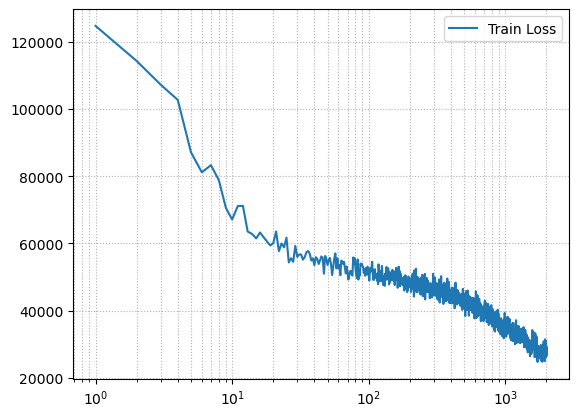

In [8]:
trainer.plot_loss_function(history_not_n)

In [9]:
trainer.test_model()

Accuracy: 0.00%
RMSE: 0.32


/opt/homebrew/anaconda3/envs/aicse/lib/python3.9/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1548])) that is different to the input size (torch.Size([1548, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/opt/homebrew/anaconda3/envs/aicse/lib/python3.9/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([516])) that is different to the input size (torch.Size([516, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


0.0